In [186]:
# Analysis notebook + plots
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy import optimize
from scipy.signal import argrelextrema

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

DEBUG = False
def debug_print(msg):
    if DEBUG:
        print(msg)

In [187]:
# Import data from CSVs generated by UCS30 app
# Usage: data = import_data()
def import_data(filename): 
    debug_print(f"Opening {filename}")
    file = open(filename, 'r')
    idx = 0
    
    roi_idx = -1
    data_idx = -1
    for row in csv.reader(file):
        if len(row) == 0:
            continue
        
        if row[0] == "ROIs:":
            roi_idx = idx+1
        elif row[0] == "Channel Data:":
            data_idx = idx+3

        idx += 1
    
    assert roi_idx != -1, "Couldn't find 'ROIs:' row"
    assert data_idx != -1, "Couldn't find 'Channel Data:' row"

    roi = pd.read_csv(filename, skiprows=roi_idx, nrows=(data_idx-roi_idx-4))
    data = pd.read_csv(filename, skiprows=data_idx)
    
    return roi, data

# Find the index of the value in array closest to provided value
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

In [188]:
# Setup large data structure
DATA = {}
ELEMENTS = ['ba133', 'cd109', 'co60', 'cs137', 'mn54', 'na22']
BOUNDS = [800, 175, 1600, 1600, 1100, 1600]
LABELS = [
    ['', '80.2keV photopeak, FWHM = ', 'unknown peak', '']
]

for i in range(len(ELEMENTS)):
    el = ELEMENTS[i]
    filename = 'data/{}.csv'.format(el)
    roi, data = import_data(filename)
    DATA[el] = {}
    DATA[el]['roi'] = roi
    DATA[el]['data'] = data
    
    DATA[el]['e_max'] = BOUNDS[i]
    #DATA[el]['features'] = LABELS[i]
    

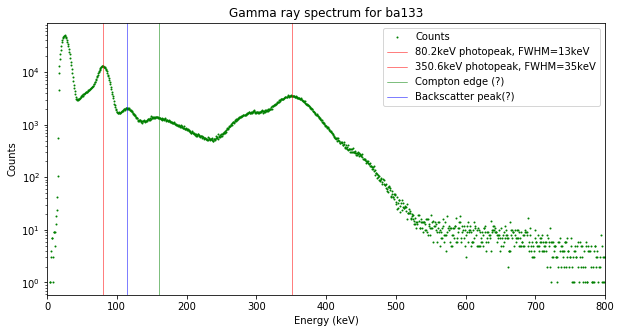

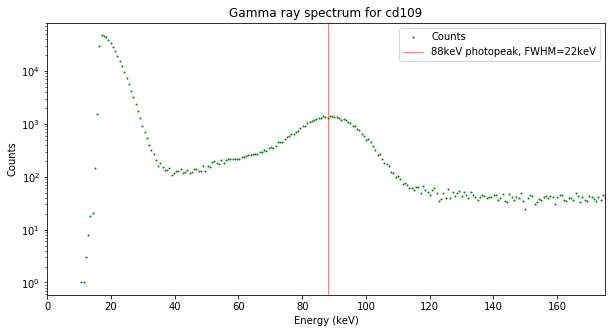

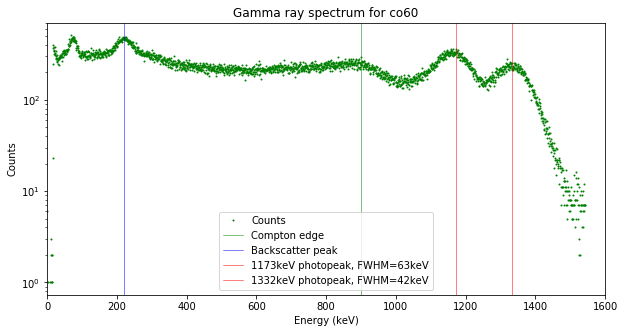

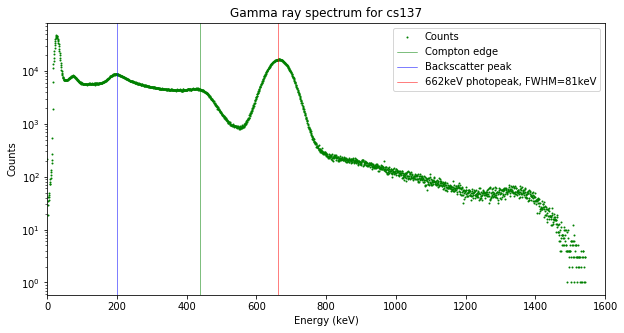

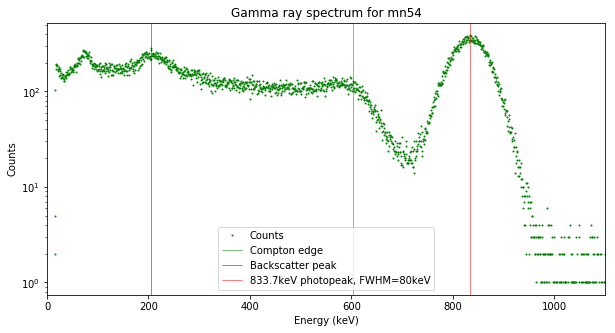

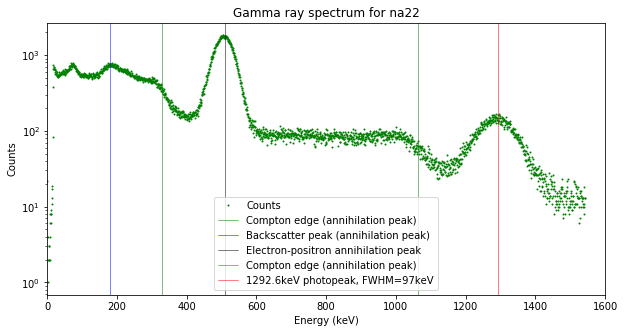

In [190]:
# co60 test
for el in ELEMENTS:
    data = DATA[el]['data']
    roi = DATA[el]['roi']
    plt.semilogy(data['Energy'], data['Counts'], 'go', markersize=1)
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts')
    plt.xlim([0, DATA[el]['e_max']])

#     n=30 # number of points to be checked before and after 
#     # Find local peaks
#     data['min'] = data.iloc[argrelextrema(data['Counts'].values, np.less_equal, order=n)[0]]['Counts']
#     data['max'] = data.iloc[argrelextrema(data['Counts'].values, np.greater_equal, order=n)[0]]['Counts']

#     plt.scatter(data['Energy'], data['min'], c='r')
#     plt.scatter(data['Energy'], data['max'], c='g')

    # ROI plotting: note that the centroid value is in eV
#     for i in range(len(roi.index)):
#         debug_print(roi.iloc[i,:]["Centroid"])
#         cent = roi.iloc[i,:]['Centroid']
#         fwhm = roi.iloc[i,:]['FWHM']
#         plt.axvline(x=cent, lw=0.25)
        
    if el == 'ba133':
        plt.axvline(x=80.2, lw=0.5, color='red', label='80.2keV photopeak, FWHM=13keV')
        plt.axvline(x=350.6, lw=0.5, color='red', label='350.6keV photopeak, FWHM=35keV')
        plt.axvline(x=160, lw=0.5, color='green', label='Compton edge (?)')
        plt.axvline(x=115, lw=0.5, color='blue', label='Backscatter peak(?)')
    elif el == 'cd109':
        plt.axvline(x=88, lw=0.5, color='red', label='88keV photopeak, FWHM=22keV')
    elif el == 'co60':
        plt.axvline(x=900, lw=0.5, color='green', label='Compton edge')
        plt.axvline(x=220, lw=0.5, color='blue', label='Backscatter peak')
        plt.axvline(x=1173, lw=0.5, color='red', label='1173keV photopeak, FWHM=63keV')
        plt.axvline(x=1332, lw=0.5, color='red', label='1332keV photopeak, FWHM=42keV')
    elif el == 'cs137':
        plt.axvline(x=440, lw=0.5, color='green', label='Compton edge')
        plt.axvline(x=200, lw=0.5, color='blue', label='Backscatter peak')
        plt.axvline(x=662, lw=0.5, color='red', label='662keV photopeak, FWHM=81keV')
    elif el == 'mn54':
        plt.axvline(x=833.7-230, lw=0.5, color='green', label='Compton edge')
        plt.axvline(x=205.5, lw=0.5, color='blue', label='Backscatter peak')
        plt.axvline(x=833.7, lw=0.5, color='red', label='833.7keV photopeak, FWHM=80keV')
    elif el == 'na22':
        plt.axvline(x=509.7-180, lw=0.5, color='green', label='Compton edge (annihilation peak)')
        plt.axvline(x=180, lw=0.5, color='blue', label='Backscatter peak (annihilation peak)')
        plt.axvline(x=509.7, lw=0.5, color='black', label='Electron-positron annihilation peak')
        plt.axvline(x=1292.6-230, lw=0.5, color='green', label='Compton edge (annihilation peak)')
        plt.axvline(x=1292.6, lw=0.5, color='red', label='1292.6keV photopeak, FWHM=97keV')
    
    
    plt.title('Gamma ray spectrum for {}'.format(el))
    plt.legend()
    plt.show()